## GRIP : THE SPARKS FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN 

## NAME : AAFTAB SHAIKH

## TASK 1 PREDICTION USING SUPERVISED ML

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px


from warnings import filterwarnings
filterwarnings('ignore')

## Reading data by link then export into a dataframe

In [2]:

#url = "http://bit.ly/w-data"
#data = pd.read_csv(url)


#data.to_csv('data.csv')

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   Hours       25 non-null     float64
 2   Scores      25 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


In [5]:
df.head()

,Unnamed: 0,Hours,Scores
0,0,2.5,21
1,1,5.1,47
2,2,3.2,27
3,3,8.5,75
4,4,3.5,30


In [6]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [7]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Corelation of data

<AxesSubplot: >

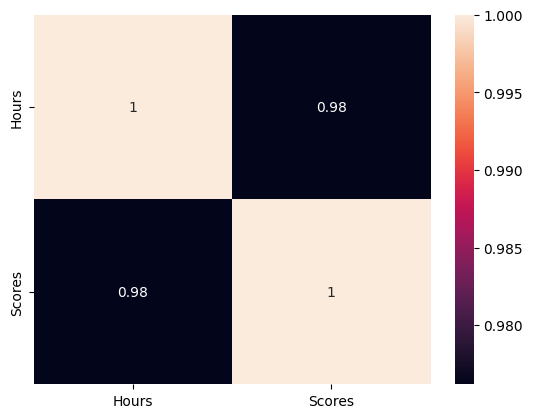

In [8]:
sns.heatmap(df.corr(),annot=True)
## highly corelate with each other

## Statistics by Data visualisation

In [9]:
px.bar(df.describe())

## data count we have is 25 records 
## mean of score is 51.48 which means student average score and average 5 hour they spend in studies
## 50% percentile = which means 50 percent of data is below 47 score and 4.8 for hours
## Max score is 95 percent with hours of above 9 hours of studies daily

## Covarince of Scores and Hours

In [10]:
px.scatter(x=df['Hours'],y=df['Scores'],labels={"x":"Hours","y":"Scores"},trendline='ols') 

## Let see the data distribution 

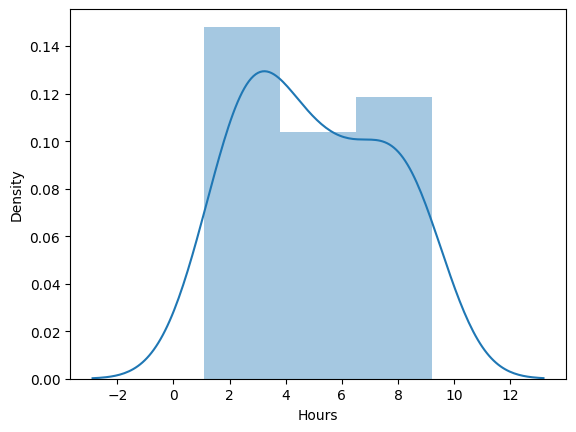

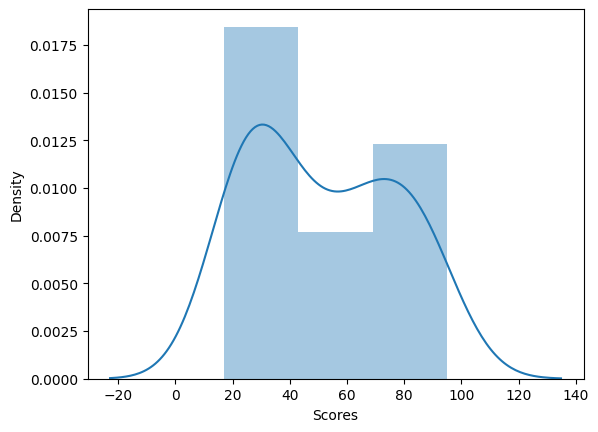

In [11]:
for col in df.columns:
    sns.distplot(df[col],kde=True)
    plt.show()

## Data is in Guassian distributed

## Let check outliers

In [12]:
px.box(df)

## data is free from outliers

## now lets select independent and dependent variables

In [13]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [14]:
#importing libs
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics


In [15]:
#splitting data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2)

In [16]:
#fitting model on data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

## Y = mx + b

## Y = dependent variable
## m=slope of best fit line (coefficent)
## x=independent variable
## b= intercept

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


## regression plot for predicted values vs actual values on test data

In [19]:
px.scatter(df1,x=y_test,y=y_pred,trendline='ols',labels={"x":"actual data","y":"predicted data"},title='actual data vs predicted data on test split')

## Evaluation of model by metrics

In [20]:
  
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 


print('mean_squared_error:', mean_squared_error(y_test, y_pred))


print('r2_score:', r2_score(y_test, y_pred))


Mean Absolute Error: 4.877039354964476
mean_squared_error: 24.387620339856596
r2_score: 0.9735538080811826


## lets calculate loss function for mse

In [21]:


from math import sqrt

mse =sqrt(24.3)

print('loss funtion of mse',mse)

loss funtion of mse 4.929503017546495


## we have 4.9 loss funtion of MSE and MAE is 4.8

In [22]:
loss_fun=[4.8,4.9]

In [23]:
loss_funtion = np.mean(loss_fun)

In [24]:
loss_funtion

4.85

## predicted data point is near by ols(best fit line) line and deos not have any data point which is far from best fit line so we can use MAE which is direct give the loss funtion value but if we use  MSE then we have to calculate it with sqare root to get the loss function from MSE 


## now if student studies for 9.5 hours and score 95 marks then we calculate this with 
## score = 95-4.85 loss function = [91 scores]

In [25]:

hours =[[9.5]]
pred = regressor.predict(hours)
print("No of Hours Study = {}".format(hours))
print("Predicted Score = {}".format(pred[0]-4.85))

No of Hours Study = [[9.5]]
Predicted Score = 91.0937543426426


## we can reduce loss function by standard scaller and can get a low loss function 

In [26]:
import statsmodels.api as sm

In [27]:
re=sm.OLS(y_test,y_pred).fit()
print(re.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              483.3
Date:                Sat, 13 May 2023   Prob (F-statistic):                    2.53e-05
Time:                        00:23:01   Log-Likelihood:                         -15.075
No. Observations:                   5   AIC:                                      32.15
Df Residuals:                       4   BIC:                                      31.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

